In [1]:
import polars as pl
import numpy as np
import math
from matplotlib import pyplot as plt

In [ ]:
sample_input_path = 'inputs/train.parquet/partition_id=0/part-0.parquet'
sample_train_df = pl.read_parquet(sample_input_path)

print('mem', sample_train_df.estimated_size('gb'))
print(sample_train_df.columns)

print(sample_train_df.head(10))

sample_train_df.describe()

In [ ]:
train_path = 'inputs/train.parquet/*/*.parquet'
train_df = pl.read_parquet(train_path)

print('mem: ', train_df.estimated_size('gb'))

train_df.describe()

In [11]:
# sample overtime step
train_path = 'inputs/train.parquet/*/*.parquet'
train_df = pl.scan_parquet(train_path)
filter = ((pl.col('time_id') >= 0) & (pl.col('time_id') < 100))
sample_df = train_df.filter(filter).collect()
print(sample_df.head(5))
# any cat column
columns_non_categorical = sample_df.to_pandas().select_dtypes(exclude='object').columns.to_list()
columns_non_categorical.sort()
columns_non_categorical


shape: (5, 93)
┌─────────┬─────────┬───────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ date_id ┆ time_id ┆ symbol_id ┆ weight   ┆ … ┆ responder_ ┆ responder_ ┆ responder_ ┆ partition_ │
│ ---     ┆ ---     ┆ ---       ┆ ---      ┆   ┆ 6          ┆ 7          ┆ 8          ┆ id         │
│ i16     ┆ i16     ┆ i8        ┆ f32      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆         ┆           ┆          ┆   ┆ f32        ┆ f32        ┆ f32        ┆ i64        │
╞═════════╪═════════╪═══════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 0       ┆ 1         ┆ 3.889038 ┆ … ┆ 0.775981   ┆ 0.346999   ┆ 0.095504   ┆ 0          │
│ 0       ┆ 0       ┆ 7         ┆ 1.370613 ┆ … ┆ 0.703665   ┆ 0.216683   ┆ 0.778639   ┆ 0          │
│ 0       ┆ 0       ┆ 9         ┆ 2.285698 ┆ … ┆ 2.109352   ┆ 0.670881   ┆ 0.772828   ┆ 0          │
│ 0       ┆ 0       ┆ 10        ┆ 0.690606 ┆ … ┆ 1.114137   ┆ 0.775199   ┆ -

['date_id',
 'feature_00',
 'feature_01',
 'feature_02',
 'feature_03',
 'feature_04',
 'feature_05',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_09',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65'

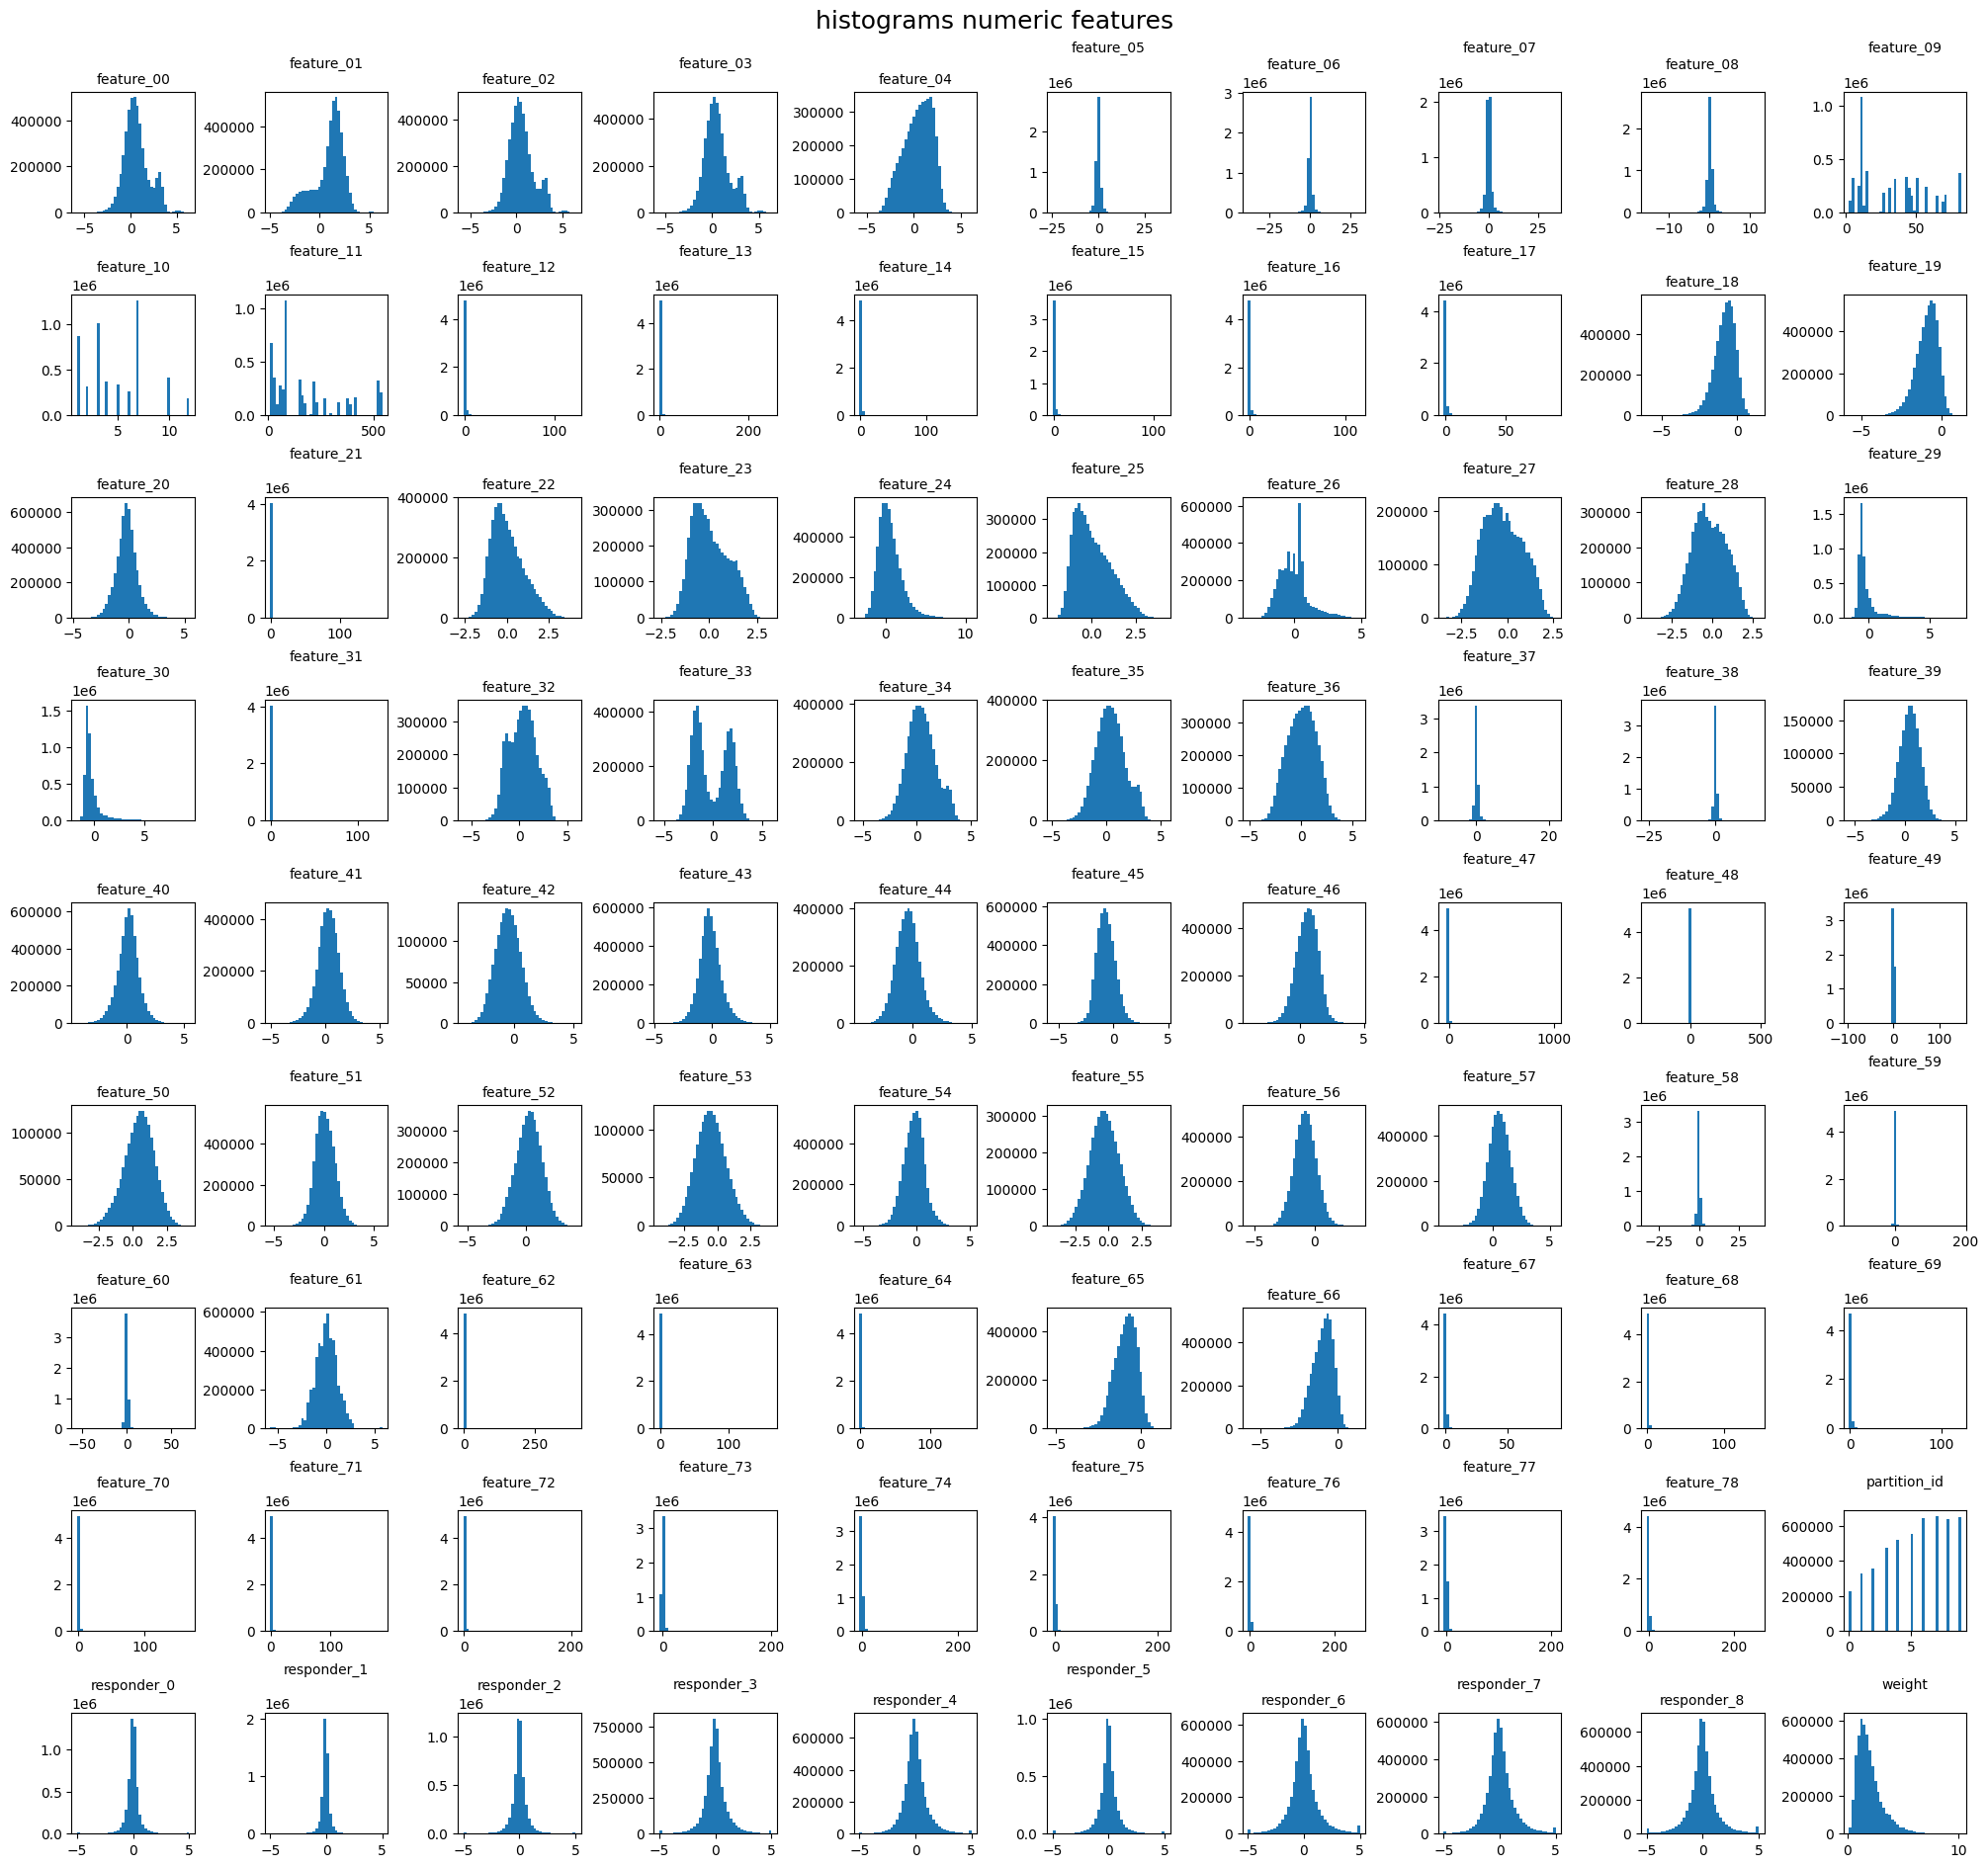

In [22]:
df = sample_df.to_pandas()

responder_cols = [x for x in df.columns if 'responder' in x]
ignore_cols = ['date_id','time_id','symbol_id']
# put responder cols last
numeric_cols = sorted(list(set(df.select_dtypes(exclude='object').columns) - set(ignore_cols) - set(responder_cols)) + responder_cols)

fig = plt.figure(figsize=(20, 20), layout="constrained")
fig.suptitle('histograms numeric features', fontsize=18)
grid_size = math.ceil(np.sqrt(len(numeric_cols)))

for i, item in enumerate(numeric_cols, 1):
    ax = plt.subplot(grid_size, grid_size, i)
    ax.hist(df[item], bins=40)
    ax_title = item
    if i % 2 == 0:
        ax_title += "\n"
    ax.set_title(ax_title)
    ax.title.set_fontsize(10)
plt.show()

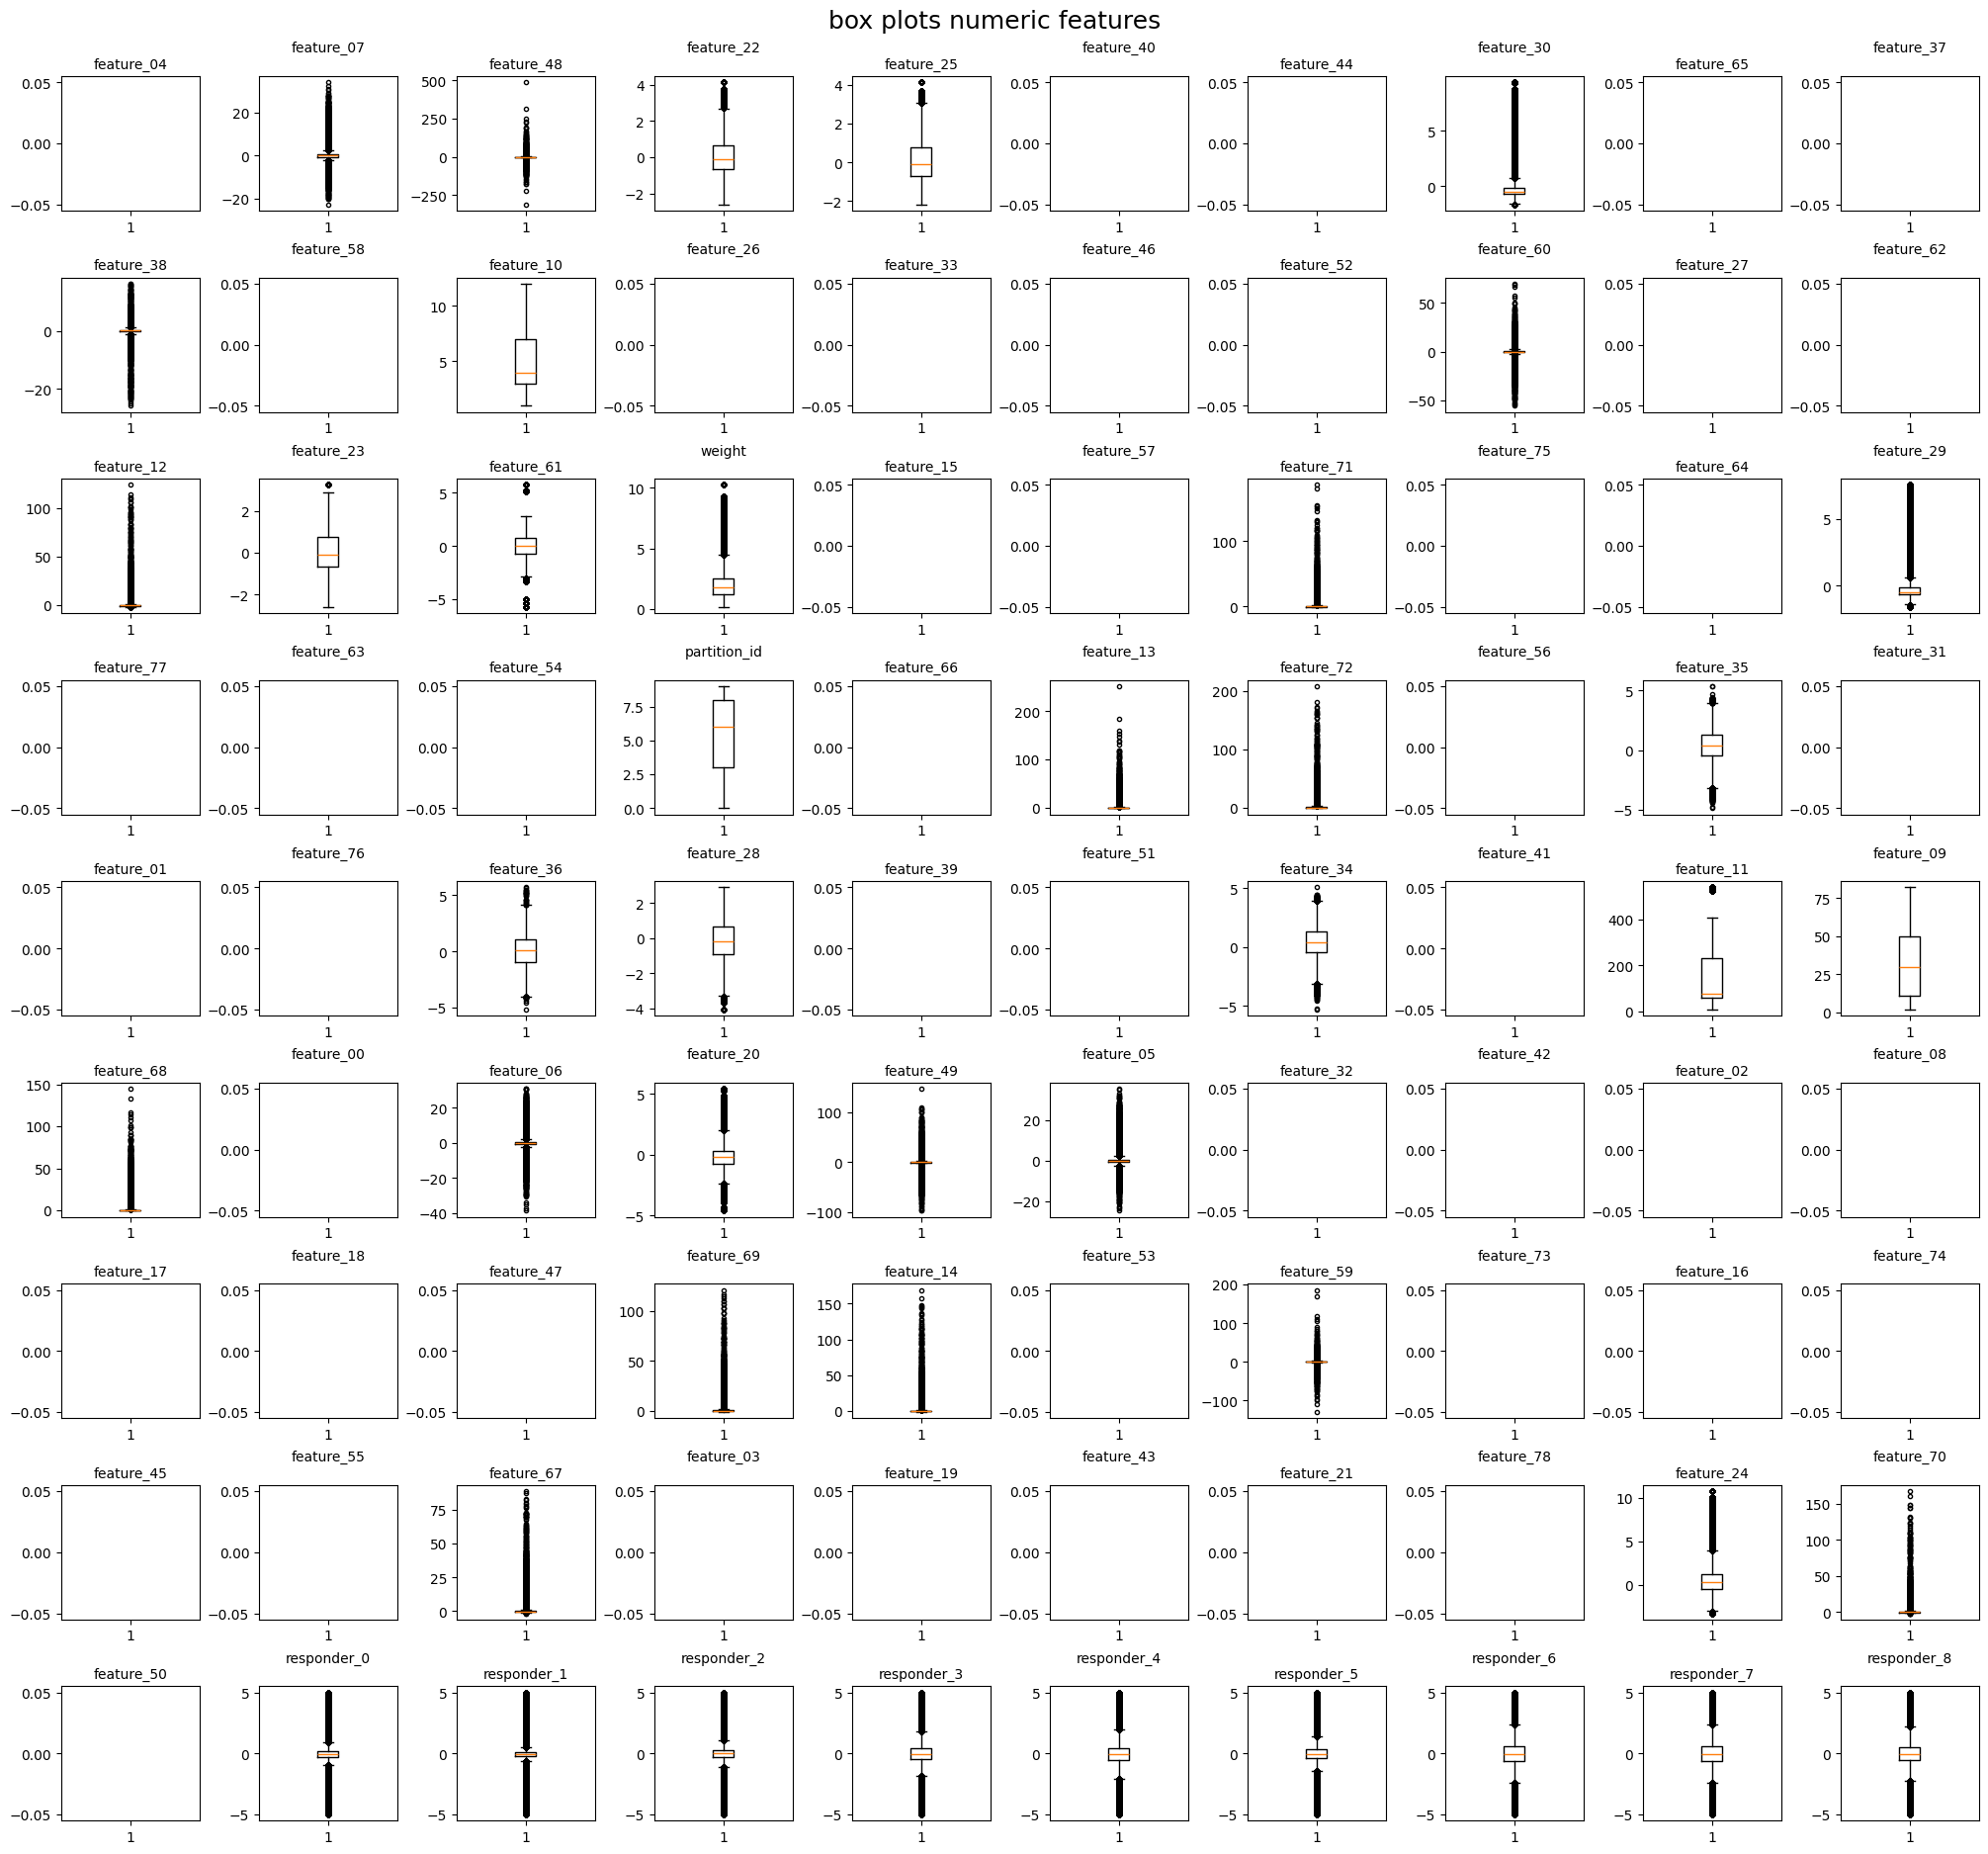

In [ ]:
fig = plt.figure(figsize=(20, 20), layout="constrained")
fig.suptitle('box plots numeric features', fontsize=18)
grid_size = math.ceil(np.sqrt(len(numeric_cols)))
for i, item in enumerate(numeric_cols5, 1):
    ax = plt.subplot(grid_size, grid_size, i)
    ax.boxplot(df[item], sym='.')
    ax_title = item
    if i % 2 == 0:
        ax_title += "\n"
    ax.set_title(ax_title)
    ax.title.set_fontsize(10)
plt.show()